In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.path.insert(0, './src')
import post_production as pp

import seaborn as sns

In [2]:
def fNL_posterior(N, S, joint, save=None):
    from matplotlib.pyplot import rc
    import matplotlib.font_manager
    rc('font',**{'size':'22','family':'serif','serif':['CMU serif']})
    rc('mathtext', **{'fontset':'cm'})
    rc('text', usetex=True)
    rc('legend',**{'fontsize':'18'})
    matplotlib.rcParams['axes.linewidth'] = 1.5
    matplotlib.rcParams['axes.labelsize'] = 20
    matplotlib.rcParams['xtick.labelsize'] = 15
    matplotlib.rcParams['ytick.labelsize'] = 15
    matplotlib.rcParams['legend.fontsize'] = 15
    #matplotlib.rcParams['legend.title_fontsize'] = 25
    matplotlib.rcParams['xtick.major.size'] = 5
    matplotlib.rcParams['ytick.major.size'] = 5
    matplotlib.rcParams['xtick.minor.size'] = 2.5
    matplotlib.rcParams['ytick.minor.size'] = 2.5
    matplotlib.rcParams['xtick.major.width'] = 1.5
    matplotlib.rcParams['ytick.major.width'] = 1.5
    matplotlib.rcParams['xtick.minor.width'] = 1.5
    matplotlib.rcParams['ytick.minor.width'] = 1.5
    matplotlib.rcParams['axes.titlesize'] = 30
    matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
    
    
    N = N.flatten()
    S = S.flatten()
    joint = joint.flatten()
    
    plt.hist(N, bins=50, density=True, label="NGC", 
         histtype="step", linestyle="dashed", linewidth=1.25,
             color="blue")
    plt.hist(S, bins=50, density=True, label="SGC", 
             histtype="step", linestyle="dotted", linewidth=1.25,
             color="red")
    plt.hist(joint, bins=50, density=True, label="joint", 
             histtype="step", linestyle="solid", linewidth=1.25,
             color="green")

    plt.xlabel("$f_{\\rm NL}$")
    plt.ylabel("$p( f_{\\rm NL} )$")
    plt.tick_params(axis='y', which='both', left=False, right=False, 
                    labelleft=False)
    plt.legend(frameon=False)
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    plt.show()
    
def fNL_posterior_comparison(FKP, optimal, save=None, ci95=None):
    from matplotlib.pyplot import rc
    import matplotlib.font_manager
    rc('font',**{'size':'22','family':'serif','serif':['CMU serif']})
    rc('mathtext', **{'fontset':'cm'})
    rc('text', usetex=True)
    rc('legend',**{'fontsize':'18'})
    matplotlib.rcParams['axes.linewidth'] = 1.5
    matplotlib.rcParams['axes.labelsize'] = 20
    matplotlib.rcParams['xtick.labelsize'] = 15
    matplotlib.rcParams['ytick.labelsize'] = 15
    matplotlib.rcParams['legend.fontsize'] = 15
    #matplotlib.rcParams['legend.title_fontsize'] = 25
    matplotlib.rcParams['xtick.major.size'] = 5
    matplotlib.rcParams['ytick.major.size'] = 5
    matplotlib.rcParams['xtick.minor.size'] = 2.5
    matplotlib.rcParams['ytick.minor.size'] = 2.5
    matplotlib.rcParams['xtick.major.width'] = 1.5
    matplotlib.rcParams['ytick.major.width'] = 1.5
    matplotlib.rcParams['xtick.minor.width'] = 1.5
    matplotlib.rcParams['ytick.minor.width'] = 1.5
    matplotlib.rcParams['axes.titlesize'] = 30
    matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
    
    
    FKP = FKP.flatten()
    optimal = optimal.flatten()
    
    plt.hist(FKP, bins=50, density=True, label="FKP", 
         histtype="step", linestyle="dashed", linewidth=1.25,
             color="red")
    plt.hist(optimal, bins=50, density=True, label="Optimal", 
             histtype="step", linestyle="dotted", linewidth=1.25,
             color="blue")

    if ci95 is not None:
        plt.axvline(ci95[0,0], linestyle="dashed", color="red")
        plt.axvline(ci95[0,1], linestyle="dashed", color="red")
        plt.axvline(ci95[1,0], linestyle="dotted", color="blue")
        plt.axvline(ci95[1,1], linestyle="dotted", color="blue")
    
    plt.xlabel("$f_{\\rm NL}$")
    plt.ylabel("$p( f_{\\rm NL} )$")
    plt.tick_params(axis='y', which='both', left=False, right=False, 
                    labelleft=False)
    plt.legend(frameon=False)
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    plt.show()
    
def fNL_posterior_comparison_smooth(FKP, optimal, save=None, ci95=None, annotate=None, xy=(100,100), xlim=None):
    from matplotlib.pyplot import rc
    import matplotlib.font_manager
    rc('font',**{'size':'22','family':'serif','serif':['CMU serif']})
    rc('mathtext', **{'fontset':'cm'})
    rc('text', usetex=True)
    rc('legend',**{'fontsize':'18'})
    matplotlib.rcParams['axes.linewidth'] = 1.5
    matplotlib.rcParams['axes.labelsize'] = 20
    matplotlib.rcParams['xtick.labelsize'] = 15
    matplotlib.rcParams['ytick.labelsize'] = 15
    matplotlib.rcParams['legend.fontsize'] = 15
    #matplotlib.rcParams['legend.title_fontsize'] = 25
    matplotlib.rcParams['xtick.major.size'] = 5
    matplotlib.rcParams['ytick.major.size'] = 5
    matplotlib.rcParams['xtick.minor.size'] = 2.5
    matplotlib.rcParams['ytick.minor.size'] = 2.5
    matplotlib.rcParams['xtick.major.width'] = 1.5
    matplotlib.rcParams['ytick.major.width'] = 1.5
    matplotlib.rcParams['xtick.minor.width'] = 1.5
    matplotlib.rcParams['ytick.minor.width'] = 1.5
    matplotlib.rcParams['axes.titlesize'] = 30
    matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
    
    
    FKP = FKP.flatten()
    optimal = optimal.flatten()
    
    sns.distplot(FKP, hist=False, kde=True, label="FKP",
                 color = 'tomato',
                 kde_kws={'linewidth': 1.5, 
                          'linestyle': 'dashed'})
    sns.distplot(optimal, hist=False, kde=True, label="Optimal",
                 color = 'darkblue',
                 kde_kws={'linewidth': 1.5, 
                          'linestyle': 'dotted'})

    if ci95 is not None:
        plt.axvline(ci95[0,0], linestyle="dashed", color="tomato")
        plt.axvline(ci95[0,1], linestyle="dashed", color="tomato")
        plt.axvline(ci95[1,0], linestyle="dotted", color="darkblue")
        plt.axvline(ci95[1,1], linestyle="dotted", color="darkblue")
    
    if annotate is not None:
        plt.annotate(annotate, xy=xy, xycoords='axes pixels')
    
    if xlim is not None:
        plt.xlim(xlim)
    
    plt.xlabel("$f_{\\rm NL}$")
    plt.ylabel("$p( f_{\\rm NL} )$")
    plt.tick_params(axis='y', which='both', left=False, right=False, 
                    labelleft=False)
    plt.legend(frameon=False)
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    plt.show()
    

def fNL_posterior_smooth(fnl, save=None, ci95=None, annotate=None, xy=(100,100), xlim=None, title=None):
    from matplotlib.pyplot import rc
    import matplotlib.font_manager
    rc('font',**{'size':'22','family':'serif','serif':['CMU serif']})
    rc('mathtext', **{'fontset':'cm'})
    rc('text', usetex=True)
    rc('legend',**{'fontsize':'18'})
    matplotlib.rcParams['axes.linewidth'] = 1.5
    matplotlib.rcParams['axes.labelsize'] = 20
    matplotlib.rcParams['xtick.labelsize'] = 15
    matplotlib.rcParams['ytick.labelsize'] = 15
    matplotlib.rcParams['legend.fontsize'] = 15
    #matplotlib.rcParams['legend.title_fontsize'] = 25
    matplotlib.rcParams['xtick.major.size'] = 5
    matplotlib.rcParams['ytick.major.size'] = 5
    matplotlib.rcParams['xtick.minor.size'] = 2.5
    matplotlib.rcParams['ytick.minor.size'] = 2.5
    matplotlib.rcParams['xtick.major.width'] = 1.5
    matplotlib.rcParams['ytick.major.width'] = 1.5
    matplotlib.rcParams['xtick.minor.width'] = 1.5
    matplotlib.rcParams['ytick.minor.width'] = 1.5
    matplotlib.rcParams['axes.titlesize'] = 30
    matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
    
    
    fnl = fnl.flatten()
    
    sns.distplot(fnl, hist=False, kde=True,
                 color = 'blue',
                 kde_kws={'linewidth': 1.5, 
                          'linestyle': 'solid'})
    
    if ci95 is not None:
        plt.axvline(ci95[0], linestyle="dashed", color="blue")
        plt.axvline(ci95[1], linestyle="dashed", color="blue")
    
    if annotate is not None:
        plt.annotate(annotate, xy=xy, xycoords='axes pixels')
    
    if title is not None:
        plt.title(title)
    
    if xlim is not None:
        plt.xlim(xlim)
    
    plt.xlabel("$f_{\\rm NL}$")
    plt.ylabel("$p( f_{\\rm NL} )$")
    plt.tick_params(axis='y', which='both', left=False, right=False, 
                    labelleft=False)
    
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

# Confidence Intervall
## Linear Weights

In [3]:
output = "fits/output-fnl/"

In [4]:
chain = np.load(output + "NGC/fkp/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC FKP p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "SGC/fkp/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC FKP p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC FKP p=1
0.0014196777753126
[26.27315177 66.69038085]
[ 5.85631485 86.94877337]
SGC FKP p=1
0.0008705706003788727
[-14.51734543  40.83650997]
[-36.02360269  72.24885796]


In [5]:
chain = np.load(output + "NGC/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "SGC/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC p=1
0.0013605030684600283
[-5.59101174 33.73900988]
[-26.85560026  51.97169984]
SGC p=1
0.0003556228707060072
[-17.15842122  29.18712531]
[-35.25782507  54.53055106]


In [6]:
chain = np.load(output + "NGC/fkp/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC FKP p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "SGC/fkp/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC FKP p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC FKP p=1.6
0.00021192527713198572
[ 49.07300855 124.69929288]
[ 10.21164874 159.44862447]
SGC FKP p=1.6
0.0001760916608510854
[-21.86777879  77.51618702]
[-61.28542851 134.70074161]


In [7]:
chain = np.load(output + "NGC/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "SGC/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC p=1.6
0.000658964614402846
[-39.0141629   28.13174477]
[-80.29090777  54.45830304]
SGC p=1.6
0.0004784023065291798
[-28.39138376  36.33701185]
[-51.26922731  74.28082659]


In [8]:
chain = np.load(output + "NGC/fkp/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC FKP p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "SGC/fkp/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC FKP p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC FKP p=3.0
0.0004417267883676246
[-142.64503647  -65.48880652]
[-176.6739752   -21.63203069]
SGC FKP p=3.0
0.0007923141646881682
[-92.08476976  21.55239087]
[-139.95657715   81.00459591]


In [9]:
chain = np.load(output + "NGC/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "SGC/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

f_nl_chain = np.delete(f_nl_chain, [2,], 1)

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC p=3.0
0.0007717514622469501
[-155.94846121 -103.89729968]
[-179.51542538  -75.61755965]
SGC p=3.0
0.0005164474350047854
[-85.36647021  17.97783653]
[-128.9139565    76.10067228]


In [10]:
chain = np.load(output + "joint/fkp/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint FKP p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "joint/fkp/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint FKP p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "joint/fkp/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint FKP p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

joint FKP p=1
-6.42811898398099e-05
[19.38065427 53.38624676]
[ 3.73368022 71.21961009]
joint FKP p=1.6
-6.0751066550346344e-05
[33.93894388 96.57348073]
[  6.47194331 129.44582108]
joint FKP p=3.0
-3.728169875794052e-05
[-113.08176808  -45.59894312]
[-143.48331066   -9.49569134]


In [11]:
chain = np.load(output + "joint/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "joint/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output + "joint/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

joint p=1
0.0006897037921334004
[-3.6232259  26.82836169]
[-18.20495809  41.92545839]
joint p=1.6
0.00014715094159001296
[-23.44540155  21.04169258]
[-43.21746523  44.00804942]
joint p=3.0
-6.791914885651007e-05
[-131.92907557  -82.68656025]
[-151.20720638  -52.21944788]


## NN Weights

In [12]:
output_NN_weights = "fits/output_NN_weights-fnl/"

In [13]:
chain = np.load(output_NN_weights + "NGC/fkp/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC FKP p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "SGC/fkp/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC FKP p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC FKP p=1
0.0001472407579410362
[ 1.34243795 44.39977396]
[-22.99878193  63.27804333]
SGC FKP p=1
0.0009375230815862334
[-17.16227103  44.75345539]
[-43.10006565  77.74321633]


In [14]:
chain = np.load(output_NN_weights + "NGC/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "SGC/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC p=1
0.00039386431350352247
[-19.90445395  21.41581007]
[-42.33239528  41.18950729]
SGC p=1
0.00027753531015428656
[-20.93162162  32.4398091 ]
[-40.31636021  62.69631627]


In [15]:
chain = np.load(output_NN_weights + "NGC/fkp/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC FKP p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "SGC/fkp/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC FKP p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC FKP p=1.6
0.000663139810971769
[-1.64771452 77.91323827]
[-38.27631973 121.01405033]
SGC FKP p=1.6
0.0008233691176913194
[-34.04988793  81.40903574]
[-82.4380464  146.11640379]


In [16]:
chain = np.load(output_NN_weights + "NGC/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "SGC/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC p=1.6
0.0006504613019406857
[-52.84301749  17.35933522]
[-95.34603606  47.14625437]
SGC p=1.6
0.0005973056890178352
[-37.33870082  40.47772907]
[-65.62413774  83.89510858]


In [17]:
chain = np.load(output_NN_weights + "NGC/fkp/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC FKP p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "SGC/fkp/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC FKP p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC FKP p=3.0
0.00023037486288268738
[-86.88546319  -3.93151593]
[-119.3487823    48.81842937]
SGC FKP p=3.0
0.0007799812554007968
[-79.88196184  34.91292271]
[-131.08114273   92.99671067]


In [18]:
chain = np.load(output_NN_weights + "NGC/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("NGC p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "SGC/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("SGC p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NGC p=3.0
0.00090972623384733
[-98.64729713 -38.35520156]
[-126.62635914   -5.42246885]
SGC p=3.0
0.0005995775836162842
[-63.36301367  39.87611174]
[-108.12656497   99.94990782]


In [19]:
chain = np.load(output_NN_weights + "joint/fkp/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)
print("joint FKP p=1.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "joint/fkp/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint FKP p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "joint/fkp/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint FKP p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

joint FKP p=1.0
0.0006836619730268279
[ 0.13429501 35.64120861]
[-16.36442254  53.92733346]
joint FKP p=1.6
3.98016246123678e-05
[ 0.2464975  66.21088201]
[-32.25707495  97.96842253]
joint FKP p=3.0
0.0009481814000535937
[-72.80468287  -4.02221775]
[-100.46609273   33.80180327]


In [20]:
chain = np.load(output_NN_weights + "joint/1.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint p=1.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "joint/1.6/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(output_NN_weights + "joint/3.0/chain.npy")

f_nl_chain = chain[:,0,:]

R = pp.gelman_rubin_R(f_nl_chain)

print("joint p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

joint p=1.0
0.0006684882727736596
[-13.8548036  18.5938372]
[-30.08124978  33.79991741]
joint p=1.6
-6.305715422405545e-05
[-32.66513233  15.49139846]
[-53.96613769  39.79785421]
joint p=3.0
0.0002114078979811307
[-79.12604007 -25.77613223]
[-103.81125646    2.59825549]


### Joint analyses:

| 68% | TW lin | TW NN | Eva lin | Eva NN |
|---|---|---|---|---|
|FKP p=1| 19 < $f_{\rm NL}$ < 53 | 0 < $f_{\rm NL}$ < 36 | 25 < $f_{\rm NL}$ < 52 | -14 < $f_{\rm NL}$ < 18 |
|Optimal p=1| -4 < $f_{\rm NL}$ < 27 | -14 < $f_{\rm NL}$ < 19 | -39 < $f_{\rm NL}$ < 25 | -17 < $f_{\rm NL}$ < 11 |
|FKP p=1.6| 34 < $f_{\rm NL}$ < 97 | 0 < $f_{\rm NL}$ < 66 | 47 < $f_{\rm NL}$ < 103 | -28 < $f_{\rm NL}$ < 31 |
|Optimal p=1.6| -23 < $f_{\rm NL}$ < 21 | -33 < $f_{\rm NL}$ < 15 | -50 < $f_{\rm NL}$ < 10 | -33 < $f_{\rm NL}$ < 10 |
|FKP p=3.0| -113 < $f_{\rm NL}$ < -46 | -73 < $f_{\rm NL}$ < -4 | None | None |
|Optimal p=3.0| -132 < $f_{\rm NL}$ < -83 | -79 < $f_{\rm NL}$ < -26 | None | None |

| 95% | TW lin | TW NN | Eva lin | Eva NN | DR14 Ema |
|---|---|---|---|---|---|
|FKP p=1| 4 < $f_{\rm NL}$ < 71 | -16 < $f_{\rm NL}$ < 54 | -65 < $f_{\rm NL}$ < 65 | -32 < $f_{\rm NL}$ < 29 | -39 < $f_{\rm NL}$ < 41 |
|Optimal p=1| -18 < $f_{\rm NL}$ < 42 | -30 < $f_{\rm NL}$ < 34 | -51 < $f_{\rm NL}$ < 33 | -31 < $f_{\rm NL}$ < 22 | -51 < $f_{\rm NL}$ < 21 |
|FKP p=1.6| 6 < $f_{\rm NL}$ < 129 | -32 < $f_{\rm NL}$ < 98 | -114 < $f_{\rm NL}$ < 133 | -61 < $f_{\rm NL}$ < 51 | -74 < $f_{\rm NL}$ < 81 |
|Optimal p=1.6| -43 < $f_{\rm NL}$ < 44 | -54 < $f_{\rm NL}$ < 40 | -68 < $f_{\rm NL}$ < 36 | -51 < $f_{\rm NL}$ < 28 | -81 < $f_{\rm NL}$ < 26 |
|FKP p=3.0| -143 < $f_{\rm NL}$ < -9 | -100 < $f_{\rm NL}$ < 34 | None | None | None |
|Optimal p=3.0| -151 < $f_{\rm NL}$ < -52 | -104 < $f_{\rm NL}$ < 3 | None | None | None|

Separated GC Results:

| NGC 95% | TW lin | TW NN | DR14 Ema |
|---|---|---|---|
|FKP p=1| 6 < $f_{\rm NL}$ < 87 | -23 < $f_{\rm NL}$ < 63 | -34 < $f_{\rm NL}$ < 61 |
|Optimal p=1| -27 < $f_{\rm NL}$ < 52 | -42 < $f_{\rm NL}$ < 41 | -56 < $f_{\rm NL}$ < 38 |
|FKP p=1.6| 10 < $f_{\rm NL}$ < 159 | -38 < $f_{\rm NL}$ < 121 | -67 < $f_{\rm NL}$ < 112 |
|Optimal p=1.6| -80 < $f_{\rm NL}$ < 54 | -95 < $f_{\rm NL}$ < 47 | -87 < $f_{\rm NL}$ < 42 |
|FKP p=3.0| -177 < $f_{\rm NL}$ < -22 | -119 < $f_{\rm NL}$ < 49 | None|
|Optimal p=3.0| -180 < $f_{\rm NL}$ < -76 | -127 < $f_{\rm NL}$ < -5 | None|

| SGC 95% | TW lin | TW NN | DR14 Ema |
|---|---|---|---|
|FKP p=1| -36 < $f_{\rm NL}$ < 72 | -43 < $f_{\rm NL}$ < 78 | -64 < $f_{\rm NL}$ < 31 |
|Optimal p=1| -35 < $f_{\rm NL}$ < 55 | -40 < $f_{\rm NL}$ < 63 | -61 < $f_{\rm NL}$ < 26 |
|FKP p=1.6| -61 < $f_{\rm NL}$ < 135 | -82 < $f_{\rm NL}$ < 146 |-122 < $f_{\rm NL}$ < 63 |
|Optimal p=1.6| -51 < $f_{\rm NL}$ < 74 | -66 < $f_{\rm NL}$ < 84 | -92 < $f_{\rm NL}$ < 42 |
|FKP p=3.0| -140 < $f_{\rm NL}$ < 81 | -131 < $f_{\rm NL}$ < 93 | None |
|Optimal p=3.0| -129 < $f_{\rm NL}$ < 76 | -108 < $f_{\rm NL}$ < 100 | None |

## $f_{\rm NL}$ Posterior

Linear p=1, FKP


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


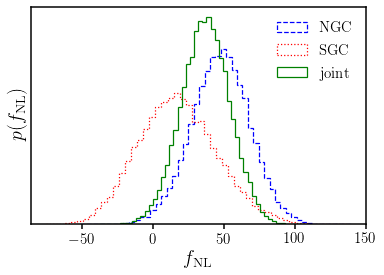

Linear p=1, optimal


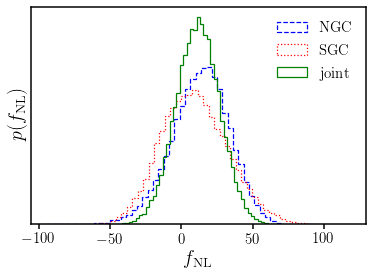

In [21]:
chain = np.load(output + "NGC/fkp/1.0/chain.npy")
f_nl_chain_N = chain[:,0,:]

chain = np.load(output + "SGC/fkp/1.0/chain.npy")
f_nl_chain_S = chain[:,0,:]

chain = np.load(output + "joint/fkp/1.0/chain.npy")
f_nl_chain_joint = chain[:,0,:]

print("Linear p=1, FKP")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

chain = np.load(output + "NGC/1.0/chain.npy")
f_nl_chain_N = chain[:,0,:]

chain = np.load(output + "SGC/1.0/chain.npy")
f_nl_chain_S = chain[:,0,:]

chain = np.load(output + "joint/1.0/chain.npy")
f_nl_chain_joint = chain[:,0,:]

print("Linear p=1, optimal")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

Linear p=1.6, FKP


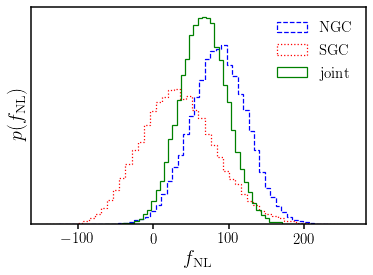

Linear p=1.6, optimal


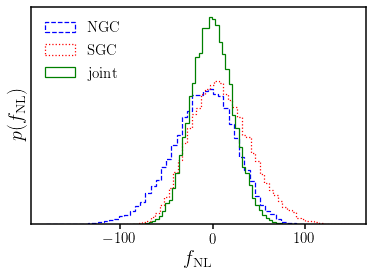

In [22]:
chain = np.load(output + "NGC/fkp/1.6/chain.npy")
f_nl_chain_N = chain[:,0,:]
chain = np.load(output + "SGC/fkp/1.6/chain.npy")
f_nl_chain_S = chain[:,0,:]

chain = np.load(output + "joint/fkp/1.6/chain.npy")
f_nl_chain_joint = chain[:,0,:]

print("Linear p=1.6, FKP")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

chain = np.load(output + "NGC/1.6/chain.npy")
f_nl_chain_N = chain[:,0,:]

chain = np.load(output + "SGC/1.6/chain.npy")
f_nl_chain_S = chain[:,0,:]

chain = np.load(output + "joint/1.6/chain.npy")
f_nl_chain_joint = chain[:,0,:]

print("Linear p=1.6, optimal")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

Linear p=3.0, FKP


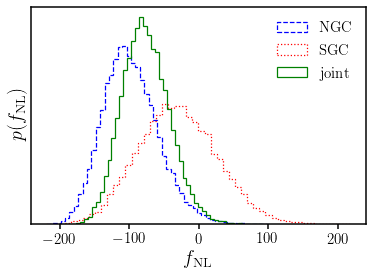

Linear p=3.0, optimal


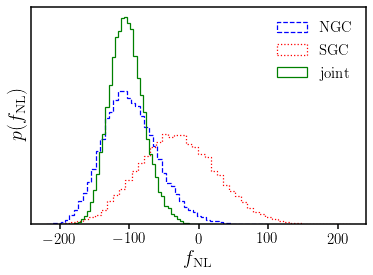

In [23]:
chain = np.load(output + "NGC/fkp/3.0/chain.npy")
f_nl_chain_N = chain[:,0,:]

chain = np.load(output + "SGC/fkp/3.0/chain.npy")
f_nl_chain_S = chain[:,0,:]

chain = np.load(output + "joint/fkp/3.0/chain.npy")
f_nl_chain_joint = chain[:,0,:]

print("Linear p=3.0, FKP")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

chain = np.load(output + "NGC/3.0/chain.npy")
f_nl_chain = chain[:,0,:]

chain = np.load(output + "SGC/3.0/chain.npy")
f_nl_chain = chain[:,0,:]

chain = np.load(output + "joint/3.0/chain.npy")
f_nl_chain_joint = chain[:,0,:]

print("Linear p=3.0, optimal")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

NN p=1, FKP


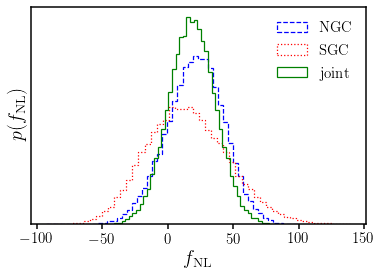

NN p=1, optimal


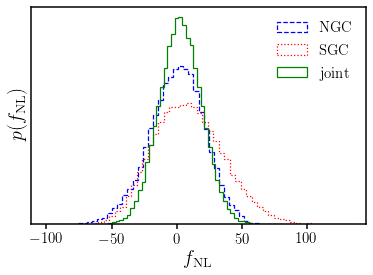

In [24]:
chain = np.load(output_NN_weights + "NGC/fkp/1.0/chain.npy")
f_nl_chain_N = chain[:,0,:]

chain = np.load(output_NN_weights + "SGC/fkp/1.0/chain.npy")
f_nl_chain_S = chain[:,0,:]

chain = np.load(output_NN_weights + "joint/fkp/1.0/chain.npy")
f_nl_chain_joint = chain[:,0,:]

print("NN p=1, FKP")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

chain = np.load(output_NN_weights + "NGC/1.0/chain.npy")
f_nl_chain_N = chain[:,0,:]

chain = np.load(output_NN_weights + "SGC/1.0/chain.npy")
f_nl_chain_S = chain[:,0,:]

chain = np.load(output_NN_weights + "joint/1.0/chain.npy")
f_nl_chain_joint = chain[:,0,:]

print("NN p=1, optimal")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

NN p=1.6, FKP


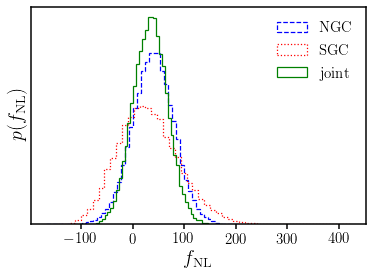

NN p=1.6, optimal


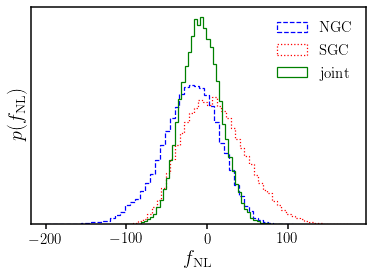

In [25]:
chain = np.load(output_NN_weights + "NGC/fkp/1.6/chain.npy")
f_nl_chain_N = chain[:,0,:]

chain = np.load(output_NN_weights + "SGC/fkp/1.6/chain.npy")
f_nl_chain_S = chain[:,0,:]

chain = np.load(output_NN_weights + "joint/fkp/1.6/chain.npy")
f_nl_chain_joint = chain[:,0,:]


print("NN p=1.6, FKP")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

chain = np.load(output_NN_weights + "NGC/1.6/chain.npy")
f_nl_chain_N = chain[:,0,:]

chain = np.load(output_NN_weights + "SGC/1.6/chain.npy")
f_nl_chain_S = chain[:,0,:]

chain = np.load(output_NN_weights + "joint/1.6/chain.npy")
f_nl_chain_joint= chain[:,0,:]

print("NN p=1.6, optimal")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

NN p=3.0, FKP


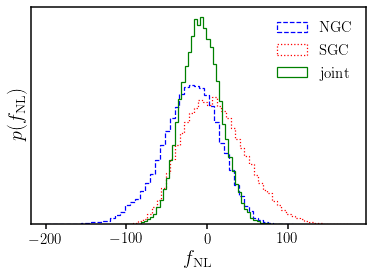

NN p=3.0, optimal


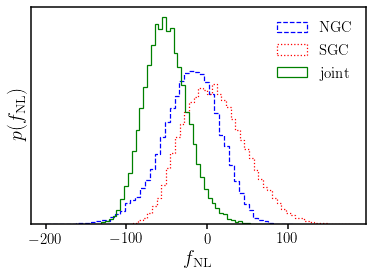

In [26]:
chain = np.load(output_NN_weights + "NGC/fkp/3.0/chain.npy")
f_nl_chain = chain[:,0,:]

chain = np.load(output_NN_weights + "SGC/fkp/3.0/chain.npy")
f_nl_chain = chain[:,0,:]

chain = np.load(output_NN_weights + "joint/fkp/3.0/chain.npy")
f_nl_chain = chain[:,0,:]

print("NN p=3.0, FKP")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

chain = np.load(output_NN_weights + "NGC/3.0/chain.npy")
f_nl_chain = chain[:,0,:]

chain = np.load(output_NN_weights + "SGC/3.0/chain.npy")
f_nl_chain = chain[:,0,:]

chain = np.load(output_NN_weights + "joint/3.0/chain.npy")
f_nl_chain_joint = chain[:,0,:]

print("NN p=3.0, optimal")
fNL_posterior(f_nl_chain_N, f_nl_chain_S, f_nl_chain_joint)

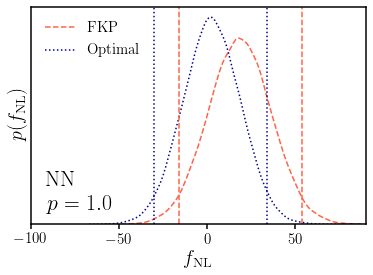

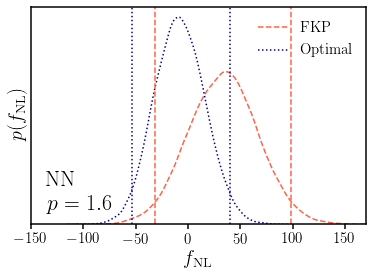

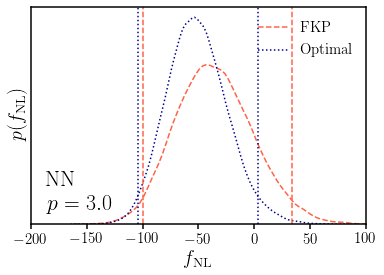

In [27]:
chain = np.load(output_NN_weights + "joint/fkp/1.0/chain.npy")
f_nl_chain_FKP = chain[:,0,:]

chain = np.load(output_NN_weights + "joint/1.0/chain.npy")
f_nl_chain_opt = chain[:,0,:]

ci95 = np.array([[-16,54],[-30,34]])

fNL_posterior_comparison_smooth(f_nl_chain_FKP, f_nl_chain_opt, save='figures/pfnl_p1p0_NN.pdf', ci95=ci95,
                               annotate="NN \n $p=1.0$", xy=(15,15), xlim=[-100, 90])

chain = np.load(output_NN_weights + "joint/fkp/1.6/chain.npy")
f_nl_chain_FKP = chain[:,0,:]

chain = np.load(output_NN_weights + "joint/1.6/chain.npy")
f_nl_chain_opt = chain[:,0,:]

ci95 = np.array([[-32,98],[-54,40]])

fNL_posterior_comparison_smooth(f_nl_chain_FKP, f_nl_chain_opt, save='figures/pfnl_p1p6_NN.pdf', ci95=ci95,
                               annotate="NN \n $p=1.6$", xy=(15,15), xlim=[-150, 170])

chain = np.load(output_NN_weights + "joint/fkp/3.0/chain.npy")
f_nl_chain_FKP = chain[:,0,:]

chain = np.load(output_NN_weights + "joint/3.0/chain.npy")
f_nl_chain_opt = chain[:,0,:]

ci95 = np.array([[-100,34],[-104,3]])

fNL_posterior_comparison_smooth(f_nl_chain_FKP, f_nl_chain_opt, save=None, ci95=ci95,
                               annotate="NN \n $p=3.0$", xy=(15,15), xlim=[-200, 100])

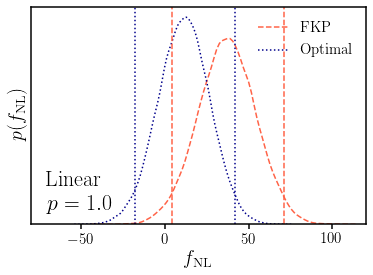

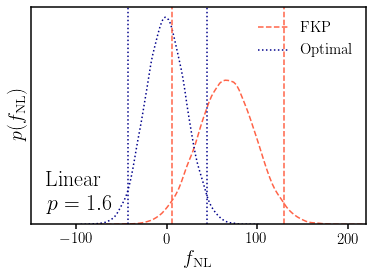

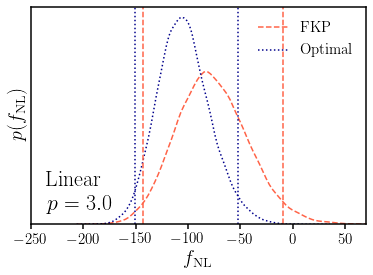

In [28]:
chain = np.load(output + "joint/fkp/1.0/chain.npy")
f_nl_chain = chain[:,0,:]
f_nl_chain_FKP = np.delete(f_nl_chain, [10,], 1)

chain = np.load(output + "joint/1.0/chain.npy")
f_nl_chain_opt = chain[:,0,:]

ci95 = np.array([[4,71],[-18,42]])

fNL_posterior_comparison_smooth(f_nl_chain_FKP, f_nl_chain_opt, save='figures/pfnl_p1p0_lin.pdf', ci95=ci95,
                               annotate="Linear \n $p=1.0$", xy=(15,15), xlim=[-80, 120])

chain = np.load(output + "joint/fkp/1.6/chain.npy")
f_nl_chain_FKP = chain[:,0,:]

chain = np.load(output + "joint/1.6/chain.npy")
f_nl_chain_opt = chain[:,0,:]

ci95 = np.array([[6,129],[-43,44]])

fNL_posterior_comparison_smooth(f_nl_chain_FKP, f_nl_chain_opt, save='figures/pfnl_p1p6_lin.pdf', ci95=ci95, 
                               annotate="Linear \n $p=1.6$", xy=(15,15), xlim=[-150, 220])

chain = np.load(output + "joint/fkp/3.0/chain.npy")
f_nl_chain_FKP = chain[:,0,:]

chain = np.load(output + "joint/3.0/chain.npy")
f_nl_chain_opt = chain[:,0,:]

ci95 = np.array([[-143,-9],[-151,-52]])

fNL_posterior_comparison_smooth(f_nl_chain_FKP, f_nl_chain_opt, save=None, ci95=ci95,
                               annotate="Linear \n $p=3.0$", xy=(15,15), xlim=[-250, 70])

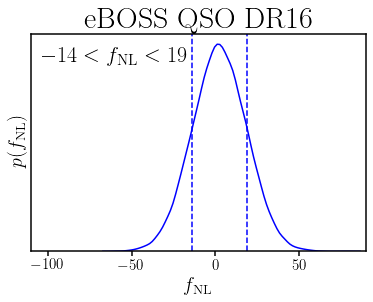

In [29]:
chain = np.load(output_NN_weights + "joint/1.0/chain.npy")
f_nl_chain_opt = chain[:,0,:]

ci95 = np.array([-14,19])

fNL_posterior_smooth(f_nl_chain_opt, save='figures/pfnl_p1p0_NN-single.png', ci95=ci95,
                    annotate="$-14 < f_{\\rm NL} < 19$", xy=(10,190), xlim=[-110, 90],
                    title="eBOSS QSO DR16")


# $f_{\rm NL} \, b_{\phi}$

In [30]:
out = "fits/output-bphi_fnl/"

dc = 1.686

chain = np.load(out + "NGC/fkp/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("Linear: NGC FKP")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "NGC/1.0/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("Linear NGC p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "NGC/1.6/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("Linear NGC p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "NGC/3.0/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("Linear NGC p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

Linear: NGC FKP
0.0008460362011677436
[131.37029681 310.46740057]
[ 34.7044718  393.57473675]
Linear NGC p=1
0.0016491138107324055
[-27.04760989 200.39027375]
[-173.74673266  287.51907567]
Linear NGC p=1.6
0.0006711748928960315
[-175.95211938  121.29803794]
[-371.03814503  234.46033552]
Linear NGC p=3.0
0.0002248858544602328
[354.23110722 554.9476828 ]
[243.29269678 640.91164961]


In [31]:
chain = np.load(out + "SGC/fkp/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("Linear: SGC FKP")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "SGC/1.0/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("Linear SGC p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "SGC/1.6/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("Linear SGC p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "SGC/3.0/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("Linear SGC p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

Linear: SGC FKP
0.0005466253967876256
[-48.04439931 198.46360227]
[-161.50626899  322.36891302]
Linear SGC p=1
0.00028877182351116915
[-93.33632936 175.55026052]
[-202.35742506  316.60714781]
Linear SGC p=1.6
0.00032611416486783007
[-120.75806825  164.73135799]
[-237.11977265  310.70388802]
Linear SGC p=3.0
0.0007863404692085574
[-61.7515548  294.51775647]
[-236.85013896  462.46416825]


In [32]:
out = "fits/output_NN_weights-bphi_fnl/"

chain = np.load(out + "NGC/fkp/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("NN NGC FKP")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "NGC/1.0/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("NN NGC p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "NGC/1.6/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("NN NGC p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "NGC/3.0/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("NN NGC p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NN NGC FKP
0.001370532496731247
[  1.98287129 192.04077815]
[-102.48185966  279.61062364]
NN NGC p=1
0.00036717184534684755
[-114.78993557  123.340051  ]
[-254.59175935  227.3829926 ]
NN NGC p=1.6
0.0004560850366961411
[-222.14269794   75.68542793]
[-408.77620933  192.0127418 ]
NN NGC p=3.0
0.00046687458120309167
[134.35835415 354.43783131]
[  7.62245429 446.59370552]


In [33]:
chain = np.load(out + "SGC/fkp/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("NN SGC FKP")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "SGC/1.0/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("NN SGC p=1")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "SGC/1.6/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("NN SGC p=1.6")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

chain = np.load(out + "SGC/3.0/chain.npy")

f_nl_chain = chain[:,0,:] * 2. * dc

R = pp.gelman_rubin_R(f_nl_chain)

print("NN SGC p=3.0")
print(R - 1)

print(pp.confidence_interval(f_nl_chain.flatten(), 0.68))
print(pp.confidence_interval(f_nl_chain.flatten(), 0.95))

NN SGC FKP
-1.756979666212022e-05
[-82.78710986 188.10323632]
[-207.00045361  322.74938296]
NN SGC p=1
0.00018957378943262881
[-128.6695548  174.3824711]
[-230.23003638  349.14295465]
NN SGC p=1.6
0.0012415672296497426
[-144.56871594  181.70585005]
[-265.24355243  354.36988189]
NN SGC p=3.0
0.00043570751084653914
[-130.42643613  225.8371981 ]
[-305.51156712  398.91229396]


| NGC 95% | TW lin | TW NN |
|---|---|---|
|FKP| 35 < $b_{\phi} \, f_{\rm NL}$ < 394 | -102 < $b_{\phi} \, f_{\rm NL}$ < 280 |
|Optimal p=1| -174 < $b_{\phi} \, f_{\rm NL}$ < 288 | -255 < $b_{\phi} \, f_{\rm NL}$ < 227 |
|Optimal p=1.6| -371 < $b_{\phi} \, f_{\rm NL}$ < 234 | -409 < $b_{\phi} \, f_{\rm NL}$ < 192 |
|Optimal p=3.0| 243 < $b_{\phi} \, f_{\rm NL}$ < 641 | 8 < $b_{\phi} \, f_{\rm NL}$ < 447 |

| SGC 95% | TW lin | TW NN |
|---|---|---|
|FKP| -162 < $b_{\phi} \, f_{\rm NL}$ < 322 | -207 < $b_{\phi} \, f_{\rm NL}$ < 323 |
|Optimal p=1| -202 < $b_{\phi} \, f_{\rm NL}$ < 317 | -230 < $b_{\phi} \, f_{\rm NL}$ < 349 |
|Optimal p=1.6| -237 < $b_{\phi} \, f_{\rm NL}$ < 311 | -265 < $b_{\phi} \, f_{\rm NL}$ < 354 |
|Optimal p=3.0| -237 < $b_{\phi} \, f_{\rm NL}$ < 462 | -306 < $b_{\phi} \, f_{\rm NL}$ < 399 |